In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
# load saved data (mtt, m1, WC) values from files

cG = np.loadtxt("cG.txt", dtype=float)
cuG_33 = np.loadtxt("cuG_33.txt", dtype=float)
cqd1_3311 = np.loadtxt("cqd1_3311.txt", dtype=float)
cqq1_3333 = np.loadtxt("cqq1_3333.txt", dtype=float)
cqu1_1133 = np.loadtxt("cqu1_1133.txt", dtype=float)
cqu8_1133 = np.loadtxt("cqu8_1133.txt", dtype=float)
cqu8_3311 = np.loadtxt("cqu8_3311.txt", dtype=float)
cuu_3333 = np.loadtxt("cuu_3333.txt", dtype=float)

In [3]:
# x and y axes (common to all)

mtt = np.unique(cG[:,0])
m1 = np.unique(cG[:,1])

In [4]:
# General plot attributes

plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300})

In [5]:
def plot_fn_2d(wc_arr, wc_name, filename):
    vals = wc_arr.reshape(len(mtt),len(m1))
    fig, ax = plt.subplots(figsize=(8, 6))
    img = ax.imshow(vals.T, cmap='RdYlBu', norm=LogNorm(),
                    origin='lower', extent=[mtt.min(), mtt.max(), m1.min(), m1.max()])

    ax.plot([mtt.min(), mtt.max()], [m1.min(), m1.max()], color='gray', linestyle='--', linewidth=1.5)
    x_fill = np.linspace(mtt.min(), mtt.max(), 100)
    ax.fill_between(x_fill, x_fill, m1.max(), color='gray', alpha=0.4)

    # Colorbar and labels
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label(wc_name, fontsize=27)
    ax.set_xlabel(r'$m_{\tilde{t}_R}$ (TeV)', fontsize=27)
    ax.set_ylabel(r'$m_1$ (TeV)', fontsize=27)
    ax.set_title(r'$g_{1} = 0.37, \quad g_{s} = 1.1$', fontsize=27, pad=16)
    ax.set_xticks([0.5,1.0,1.5,2.0])
    ax.set_yticks([0.5,1.0,1.5,2.0])
    plt.tight_layout()
    #plt.show()
    plt.savefig(filename)

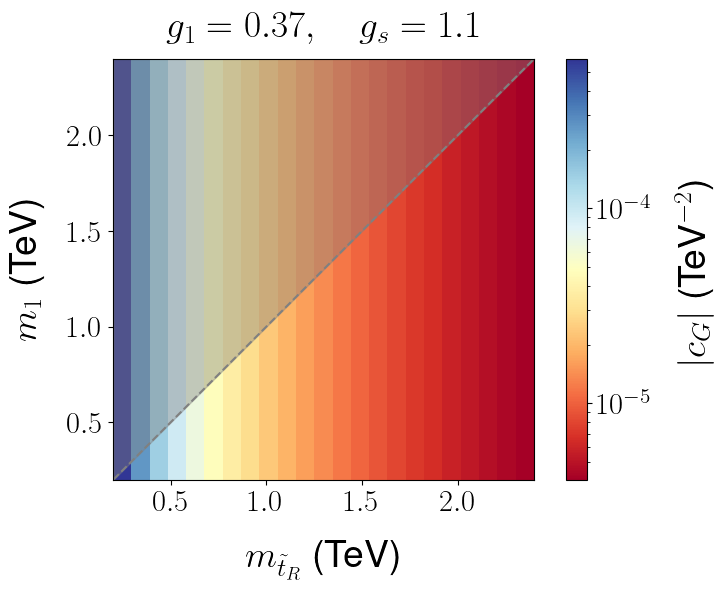

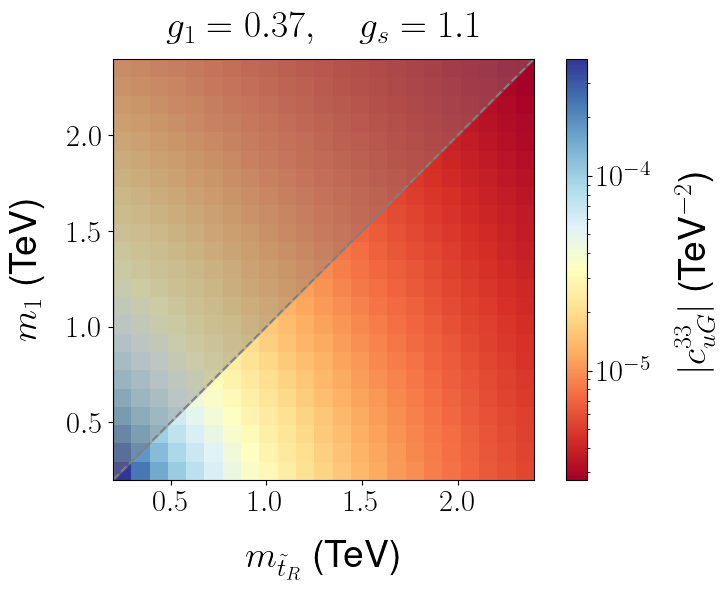

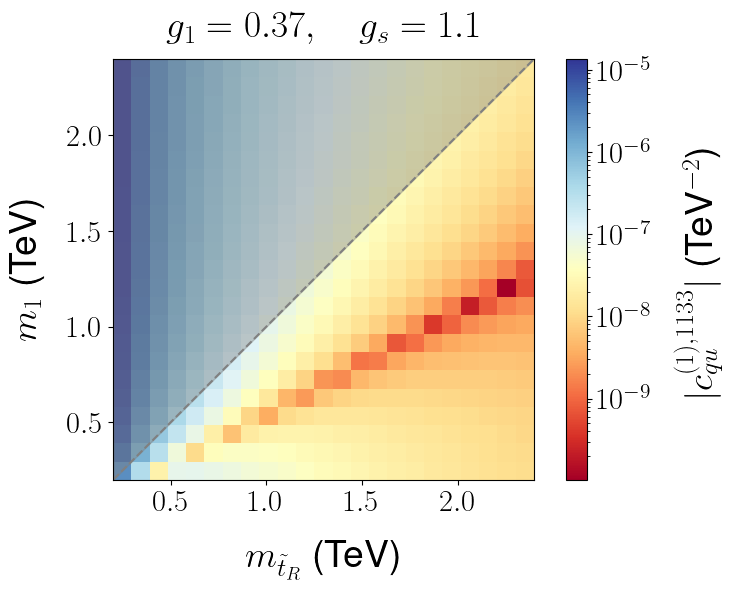

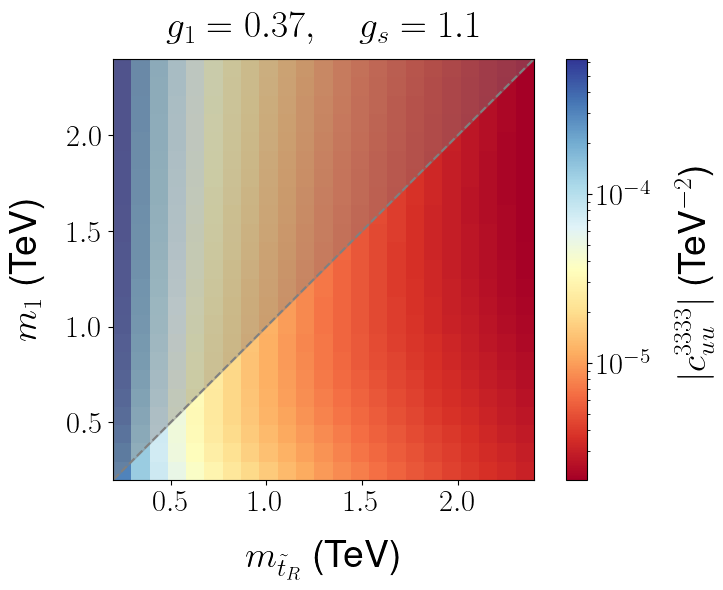

In [6]:
plot_fn_2d(cG[:,2], r'$|c_{G}|$ (TeV${}^{-2}$)', "cG.pdf")
plot_fn_2d(abs(cuG_33[:,2]), r'$|c_{uG}^{33}|$ (TeV${}^{-2}$)', "cuG_33.pdf")
plot_fn_2d(abs(cqu1_1133[:,2]), r'$|c_{qu}^{(1),1133}|$ (TeV${}^{-2}$)', "cqu1_1133.pdf")
plot_fn_2d(abs(cuu_3333[:,2]), r'$|c_{uu}^{3333}|$ (TeV${}^{-2}$)', "cuu_3333.pdf")